In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
plt.style.use('fivethirtyeight')

In [68]:
raw_D = pd.read_csv('./data/covid19.csv')
raw_D.head()

,지역 + 시,"기준일(발병일, 확진일 선택)",무증상/조사중,"필터(무증상,조사중 제외)",무증상/조사중 기준일,지역,지역 (group),확진일자,Number of Records
0,고양시,1/26/2020,,True,1/26/2020,고양일산서,고양,1/26/2020,1
1,평택시,1/27/2020,,True,1/27/2020,평택,평택,1/27/2020,1
2,부천시,2/1/2020,,True,2/1/2020,부천,부천,2/1/2020,1
3,부천시,2/2/2020,,True,2/2/2020,부천,부천,2/2/2020,1
4,수원시,2/5/2020,,True,2/5/2020,수원장안,수원,2/5/2020,1


In [10]:
raw_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20336 entries, 0 to 20335
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   지역 + 시             20336 non-null  object
 1   기준일(발병일, 확진일 선택)   20336 non-null  object
 2   무증상/조사중            20336 non-null  object
 3   필터(무증상,조사중 제외)     20336 non-null  bool  
 4   무증상/조사중 기준일        20332 non-null  object
 5   지역                 20336 non-null  object
 6   지역 (group)         20336 non-null  object
 7   확진일자               20336 non-null  object
 8   Number of Records  20336 non-null  int64 
dtypes: bool(1), int64(1), object(7)
memory usage: 1.3+ MB


In [13]:
raw_D.shape

(20336, 9)

In [73]:
raw_D["연번"] = list(reversed(range(0,len(raw_D))))
# raw_D.head()
raw_D.taijl()

,지역 + 시,"기준일(발병일, 확진일 선택)",무증상/조사중,"필터(무증상,조사중 제외)",무증상/조사중 기준일,지역,지역 (group),확진일자,Number of Records,연번
0,고양시,1/26/2020,,True,1/26/2020,고양일산서,고양,1/26/2020,1,20335
1,평택시,1/27/2020,,True,1/27/2020,평택,평택,1/27/2020,1,20334
2,부천시,2/1/2020,,True,2/1/2020,부천,부천,2/1/2020,1,20333
3,부천시,2/2/2020,,True,2/2/2020,부천,부천,2/2/2020,1,20332
4,수원시,2/5/2020,,True,2/5/2020,수원장안,수원,2/5/2020,1,20331


In [87]:
# 최근 데이터 순으로 정렬
df = raw_D.sort_values(by="연번", ascending=True)
df.head()

,지역 + 시,"기준일(발병일, 확진일 선택)",무증상/조사중,"필터(무증상,조사중 제외)",무증상/조사중 기준일,지역,지역 (group),확진일자,Number of Records,연번
20335,성남시,8/27/2020,확인불가,True,8/27/2020,성남분당,성남,8/27/2020,1,0
20334,양평군,8/27/2020,확인불가,True,8/27/2020,양평,양평,8/27/2020,1,1
20333,안산시,8/21/2020,확인불가,True,8/21/2020,안산단원,안산,8/21/2020,1,2
20332,남양주시,8/28/2020,확인불가,True,8/28/2020,남양주풍양,남양주,8/28/2020,1,3
20331,안산시,1/8/2021,확인불가,True,1/8/2021,안산단원,안산,1/8/2021,1,4


----------------------------------------------------------------------------------------------

1)__ 확진일

In [93]:
df["확진일자"] = pd.to_datetime(df["확진일자"])
df["월"] = df["확진일자"].dt.month
df["주"] = df["확진일자"].dt.week
df[["확진일자","월","주"]].head()

,확진일자,월,주
20335,2020-08-27,8,35
20334,2020-08-27,8,35
20333,2020-08-21,8,34
20332,2020-08-28,8,35
20331,2021-01-08,1,1


1-1)__ 확진 일자별 확진자 현황

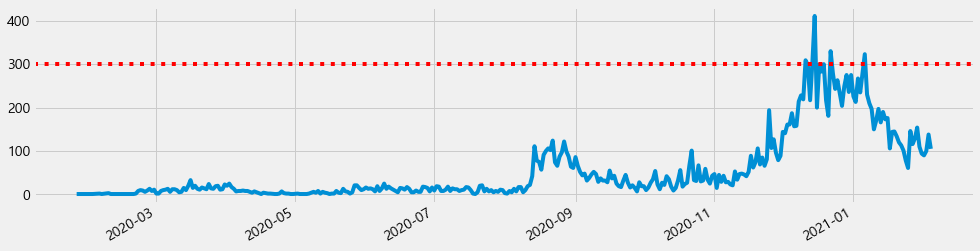

In [109]:
df["확진일자"].value_counts().plot(figsize=(15,4))
plt.axhline(300, color="red", linestyle=":")

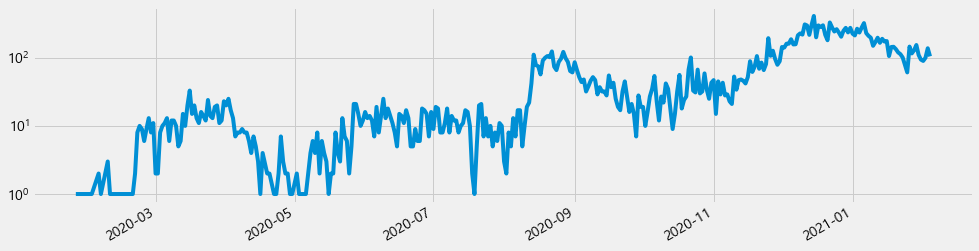

In [104]:
# LOG SACLE
Status = df["확진일자"].value_counts().plot(figsize=(15,4))
Status.set_yscale('log')